In [76]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [100]:
dataset = pd.read_csv('/content/sample_data/heart.csv')

dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#Data Analysis

Univariate

In [78]:
dataset.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [79]:
target.shape

(303,)

In [80]:
dataset.shape

(303, 14)

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = dataset.copy()

In [82]:
X = data.iloc[:,0:13]
Y = data.iloc[:,-1]
bestFeatures = SelectKBest(score_func=chi2) 
#X_train, X_test, Y_train, Y_test = train_test_split(dataset, target, test_size= 0.2, stratify=target, random_state=2)

In [83]:
fit = bestFeatures.fit(X,Y)

In [84]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two df
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs','Scores']
features_selected = featureScores.nlargest(10,'Scores')
print(features_selected)

       Specs      Scores
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835


In [85]:
#Filtering the columns selected
X = X.loc[:,X.columns.isin(features_selected['Specs'])]

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=target, random_state=2)

#Model Training

In [87]:
model = LogisticRegression()

model.fit(X_train, Y_train)

feature_imp = pd.DataFrame(model.coef_[0], index = X.columns, columns=['Importance']).sort_values('Importance',ascending=False)
print(feature_imp)

          Importance
cp          0.863900
slope       0.340224
thalach     0.026026
age        -0.000366
chol       -0.005355
trestbps   -0.009859
oldpeak    -0.473914
ca         -0.771433
exang      -0.985842
sex        -1.707641


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [88]:
model.predict(X_train)

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [89]:
print(accuracy_score(Y_train, model.predict(X_train)))

0.8347107438016529


In [90]:
print(accuracy_score(Y_test, model.predict(X_test)))

0.8524590163934426


#Visualization

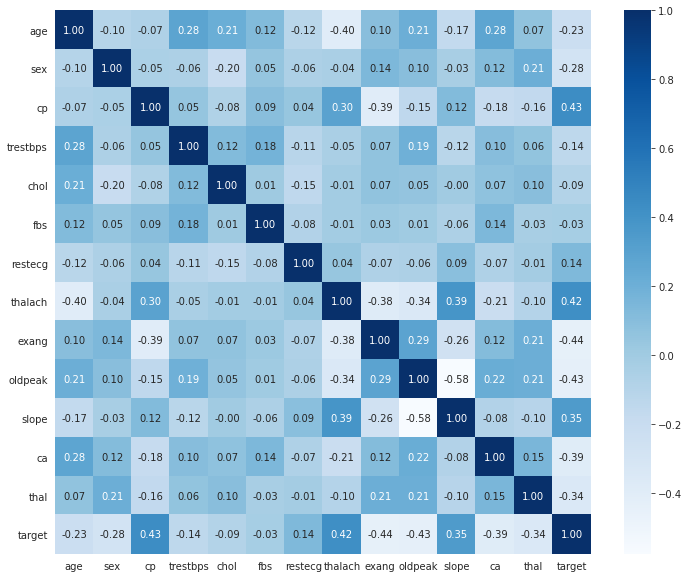

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(), annot=True, cmap="Blues", fmt='.2f')

#Count Plot

In [92]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

def chng(sex):
  if sex == 0:
    return 'Female'
  return 'Male'

def chng2(prob):
  if prob == 0:
    return 'Heart disease'
  return 'No Heart Disease'

data['sex'] = data['sex'].apply(chng)
data['target'] = data['target'].apply(chng2)

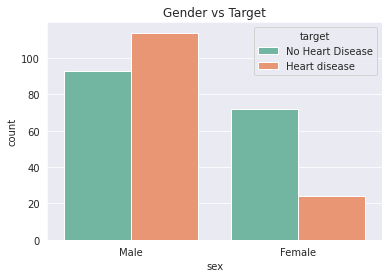

In [98]:
sns.countplot(data=data, x='sex', hue='target')
plt.title('Gender vs Target')
plt.show()

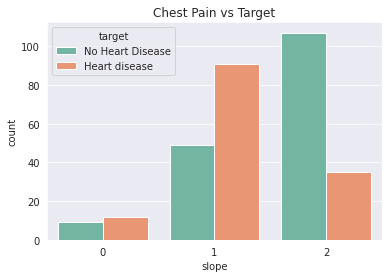

In [101]:
sns.countplot(data=data, x='slope', hue='target')
plt.title('Chest Pain vs Target')
plt.show()